In [1]:
import sys
root_dir = '../../../'
sys.path.append(root_dir)

In [2]:
import pickle
from utils import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [5]:
df = pd.read_csv('../02_daemon/w-df.csv', header=None)
df.head()

,0,1,2,3,4,5
0,0.024096,0.007265,0.983278,0.983278,0.000000,1.0
1,0.023880,0.014476,0.867925,0.773585,0.059148,0.0
2,0.052420,0.010453,0.739130,0.637681,0.048948,0.0
3,0.090847,0.005148,0.733333,0.566667,0.220208,0.0
4,0.013917,0.010669,0.989619,0.989619,0.000000,1.0


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=23
)

## SVM Classifier

In [7]:
param_grid = {
    'C': [1, 3, 5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
estimator = SVC()
svc = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [8]:
print(f'best estimator:\t\t{svc.best_estimator_}')
print(f'best params:\t\t{svc.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		SVC(C=5)
best params:		{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy:		0.7277177825773938

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71      3456
         1.0       0.70      0.79      0.74      3489

    accuracy                           0.73      6945
   macro avg       0.73      0.73      0.73      6945
weighted avg       0.73      0.73      0.73      6945



In [9]:
with open('w-svc.pickle', 'wb') as f:
    pickle.dump(svc, f)

## KNN Classifier

In [10]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 15, 20, 25, 30]
}
estimator = KNeighborsClassifier()
knn = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
print(f'best estimator:\t\t{knn.best_estimator_}')
print(f'best params:\t\t{knn.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		KNeighborsClassifier(leaf_size=5, n_neighbors=17, weights='distance')
best params:		{'leaf_size': 5, 'n_neighbors': 17, 'weights': 'distance'}
accuracy:		0.7686105111591073

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      3456
         1.0       0.78      0.76      0.77      3489

    accuracy                           0.77      6945
   macro avg       0.77      0.77      0.77      6945
weighted avg       0.77      0.77      0.77      6945



In [12]:
with open('w-knn.pickle', 'wb') as f:
    pickle.dump(knn, f)

## Logistic Regression

In [13]:
logreg = LogisticRegression()

param_grid = {
    'C': [1, 3, 5], 
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000]

}
estimator = LogisticRegression()
logreg = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid,
    scoring = 'accuracy'
)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [14]:
print(f'best estimator:\t\t{logreg.best_estimator_}')
print(f'best params:\t\t{logreg.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		LogisticRegression(C=1, max_iter=1000, penalty='none', solver='newton-cg')
best params:		{'C': 1, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}
accuracy:		0.7115910727141829

Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.61      0.68      3456
         1.0       0.68      0.82      0.74      3489

    accuracy                           0.71      6945
   macro avg       0.72      0.71      0.71      6945
weighted avg       0.72      0.71      0.71      6945



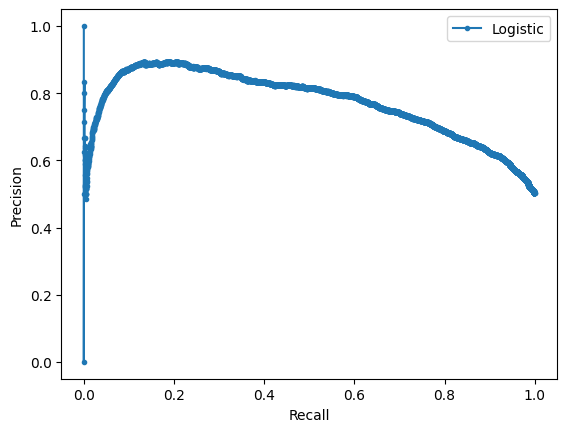

In [15]:
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [16]:
with open('w-logreg.pickle', 'wb') as f:
    pickle.dump(logreg, f)

## Gradient Boosting Classifier

In [17]:
param_grid = {
    'learning_rate': [0.01, 0.1 ], 
    'n_estimators': [100, 500, 1000]
}
estimator = GradientBoostingClassifier()
gradboost = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = 'accuracy'
)
gradboost.fit(X_train, y_train)
y_pred = gradboost.predict(X_test)

In [18]:
print(f'best estimator:\t\t{gradboost.best_estimator_}')
print(f'best params:\t\t{gradboost.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		GradientBoostingClassifier(n_estimators=500)
best params:		{'learning_rate': 0.1, 'n_estimators': 500}
accuracy:		0.7621310295176386

Classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76      3456
         1.0       0.77      0.76      0.76      3489

    accuracy                           0.76      6945
   macro avg       0.76      0.76      0.76      6945
weighted avg       0.76      0.76      0.76      6945



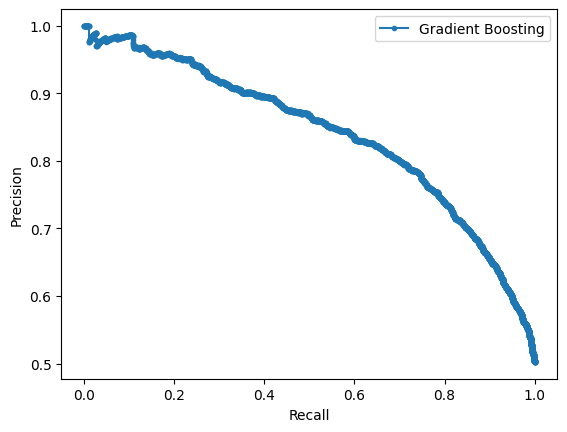

In [19]:
lr_probs = gradboost.predict_proba(X_test)
lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
plt.plot(lr_recall, lr_precision, marker='.', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [20]:
with open('w-gradboost.pickle', 'wb') as f:
    pickle.dump(gradboost, f)

## MLP Classifier

In [21]:
param_grid = {
    'solver': ['adam'], 
    'activation': ['relu']
}
estimator = MLPClassifier()
mlp = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = 'accuracy'
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [22]:
print(f'best estimator:\t\t{mlp.best_estimator_}')
print(f'best params:\t\t{mlp.best_params_}')
print(f'accuracy:\t\t{accuracy_score(y_test, y_pred)}')
print('\nClassification report:')
print(classification_report(y_test, y_pred))

best estimator:		MLPClassifier()
best params:		{'activation': 'relu', 'solver': 'adam'}
accuracy:		0.7388048956083514

Classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      3456
         1.0       0.74      0.74      0.74      3489

    accuracy                           0.74      6945
   macro avg       0.74      0.74      0.74      6945
weighted avg       0.74      0.74      0.74      6945



In [23]:
with open('w-mlp.pickle', 'wb') as f:
    pickle.dump(mlp, f)